In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [66]:
Customer_Acqusition=pd.read_excel('C:/Users/hp/Credit_Card_Data.xlsx',sheet_name=0)

In [27]:
Spend=pd.read_excel('C:/Users/hp/Credit_Card_Data.xlsx',sheet_name=1)

In [28]:
Repayment=pd.read_excel('C:/Users/hp/Credit_Card_Data.xlsx',sheet_name=2)

In [31]:
Customer_Acqusition.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [32]:
Spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,467747.601626
2,3,A1,2004-01-15,CLOTHES,86878.954735
3,4,A1,2004-01-25,FOOD,269175.011875
4,5,A1,2005-01-17,CAMERA,3406.639477


In [33]:
Repayment.head(5)

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.141919
1,2,A1,2004-01-03,131778.688758
2,3,A1,2004-01-15,485981.516736
3,4,A1,2004-01-25,452865.826385
4,5,A1,2005-01-17,154684.838196


In [34]:
Customer_Acqusition.shape

(100, 8)

In [35]:
Spend.shape

(1500, 5)

In [36]:
Repayment.shape

(1500, 4)

# 1. In the above dataset,

# a. In case age is less than 18, replace it with mean of age values.

In [73]:
Customer_Acqusition.loc[Customer_Acqusition.Age<18,'Age']=Customer_Acqusition.loc[Customer_Acqusition.Age<18,'Age'].mean()

In [74]:
Customer_Acqusition.loc[Customer_Acqusition.Age<18,'Age']

10    9.628219
12    9.628219
14    9.628219
16    9.628219
18    9.628219
21    9.628219
26    9.628219
30    9.628219
32    9.628219
34    9.628219
35    9.628219
39    9.628219
42    9.628219
47    9.628219
59    9.628219
60    9.628219
63    9.628219
64    9.628219
68    9.628219
69    9.628219
76    9.628219
84    9.628219
85    9.628219
91    9.628219
99    9.628219
Name: Age, dtype: float64

# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [120]:
join1=pd.merge(Customer_Acqusition,Spend,left_on='Customer',right_on='Customer',how='inner')

In [121]:
Final_join=pd.merge(join1,Repayment,left_on='Customer',right_on='Customer',how='inner')

In [143]:
join1.loc[join1.Amount>join1.Limit,'Amount']=join1.loc[join1.Amount>join1.Limit,'Amount']*0.5

In [144]:
join1.loc[join1.Amount>join1.Limit,'Amount']

19      123641.926650
21      220405.632211
23      197775.636060
24      152202.257852
28      148255.063243
            ...      
1484    209975.788997
1485    111664.064855
1496     67202.333079
1497    223055.460091
1498     54068.597585
Name: Amount, Length: 500, dtype: float64

In [146]:
join1.loc[join1.Amount>join1.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
19,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC,118,2005-02-28,TRAIN TICKET,123641.926650
21,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC,146,2004-11-23,PETRO,220405.632211
23,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC,174,2006-11-03,MOVIE TICKET,197775.636060
24,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC,188,2006-02-04,FOOD,152202.257852
28,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC,244,2006-05-06,TRAIN TICKET,148255.063243
...,...,...,...,...,...,...,...,...,...,...,...,...
1484,85,A85,9.628219,CHENNAI,Silver,100001,C8,Govt,87,2006-03-28,BUS TICKET,209975.788997
1485,86,A86,9.628219,TRIVANDRUM,Silver,100002,C9,Govt,88,2006-03-29,TRAIN TICKET,111664.064855
1496,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,67202.333079
1497,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,223055.460091


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [161]:
Final_join.loc[Final_join.Amount_y>Final_join.Limit,'Amount_y']=Final_join.loc[:,'Limit']

In [165]:
Final_join.loc[Final_join.Amount_y==Final_join.Limit,['Limit','Amount_y']]

,Limit,Amount_y
324,100000,100000.0
325,100000,100000.0
326,100000,100000.0
327,100000,100000.0
328,100000,100000.0
...,...,...
37279,100000,100000.0
37280,10000,10000.0
37281,10001,10001.0
37282,10002,10002.0


# 2. From the above dataset create the following summaries:

# a. How many distinct customers exist?

In [185]:
Final_join.Customer.nunique()

100

# b. How many distinct categories exist?

In [186]:
Final_join.Type.nunique()

15

# c. What is the average monthly spend by customers?

In [226]:
round(Spend.groupby(Spend.Month.dt.month)['Amount'].mean(),0)

Month
1     258969.0
2     241764.0
3     265399.0
4     251052.0
5     238554.0
6     250374.0
7     292168.0
8     257768.0
9     241256.0
10    202366.0
11    251717.0
12    208680.0
Name: Amount, dtype: float64

# d. What is the average monthly repayment by customers?

In [228]:
round(Repayment.groupby(Repayment.Month.dt.month)['Amount'].mean(),0)

Month
1     250726.0
2     245963.0
3     251989.0
4     231388.0
5     249141.0
6     267582.0
7     251181.0
8     269023.0
9     212215.0
10    258625.0
11    268600.0
12    207628.0
Name: Amount, dtype: float64

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
## (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [625]:
Monthly_profit=Final_join.loc[:,'Amount_y']-Final_join.loc[:,'Amount_x']
Monthly_profit

0         -5122.838893
1       -212276.292055
2        141926.535923
3        108810.845572
4       -189370.142617
             ...      
37279      5630.821198
37280   -124404.666159
37281   -436109.920182
37282    -98135.195169
37283     53748.701769
Length: 37284, dtype: float64

In [629]:
Final_join.loc[:,'Monthly_profit']=Monthly_profit

In [636]:
interest=Monthly_profit.loc[Monthly_profit>0]*2.9/100
Final_join.loc[:,'interest']=interest

In [647]:
Final_join.loc[Final_join.Monthly_profit>0,['Customer','Amount_x','Amount_y','Monthly_profit','interest']]

,Customer,Amount_x,Amount_y,Monthly_profit,interest
2,A1,344054.980813,485981.516736,141926.535923,4115.869542
3,A1,344054.980813,452865.826385,108810.845572,3155.514522
10,A1,344054.980813,407382.385118,63327.404305,1836.494725
11,A1,344054.980813,435747.739802,91692.758989,2659.090011
15,A1,344054.980813,375968.963949,31913.983136,925.505511
...,...,...,...,...,...
37276,A93,164093.690713,491626.294677,327532.603964,9498.445515
37277,A94,38195.254289,388682.581736,350487.327448,10164.132496
37278,A95,281975.205712,381370.442582,99395.236870,2882.461869
37279,A96,94369.178802,100000.000000,5630.821198,163.293815


# f. What are the top 5 product types?

In [289]:
Final_join

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,BIKE,94369.178802,98,2004-01-25,100000.000000
37280,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,134404.666159,99,2004-01-12,10000.000000
37281,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,446110.920182,100,2004-01-03,10001.000000
37282,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,AIR TICKET,108137.195169,101,2004-01-15,10002.000000


In [297]:
Top5=Final_join.groupby(['Type'])['Amount_x'].max().sort_values(axis=0,ascending=False).head(5)

In [298]:
Top5

Type
PETRO           499980.650083
TRAIN TICKET    499899.232368
AIR TICKET      499889.614388
AUTO            499125.966923
CLOTHES         498998.715662
Name: Amount_x, dtype: float64

# g. Which city is having maximum spend?

In [304]:
Final_join.loc[:,['City','Amount_x']].max()

City           TRIVANDRUM
Amount_x    499980.650083
dtype: object

# h. Which age group is spending more money?

In [313]:
Age_group=pd.cut(Final_join.Age,bins=[5,25,45,65,85,100])

In [314]:
Final_join.loc[:,'Age_group']=Age_group

In [316]:
Final_join.groupby('Age_group')['Amount_x'].max()

Age_group
(5, 25]      499980.650083
(25, 45]     499125.966923
(45, 65]     499899.232368
(65, 85]     499917.418986
(85, 100]              NaN
Name: Amount_x, dtype: float64

# i. Who are the top 10 customers in terms of repayment?

In [320]:
Repayment.sort_values(by='Amount',ascending=False).head(10)

,SL No:,Customer,Month,Amount
976,977,A38,2005-11-20,499405.488789
1269,1270,A56,2005-02-01,499284.509647
244,245,A3,2005-02-03,498554.425795
632,633,A42,2005-05-27,498112.117066
652,653,A33,2006-07-03,496965.294042
593,594,A13,2005-02-16,496905.458212
1260,1261,A47,2006-10-03,495872.025326
1053,1054,A43,2004-01-03,495074.577306
1438,1439,A51,2006-03-31,494578.452211
210,211,A11,2006-03-28,493830.393161


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [361]:
year=Final_join.Month_x.dt.strftime('%Y')
year

0        2004
1        2004
2        2004
3        2004
4        2004
         ... 
37279    2004
37280    2004
37281    2004
37282    2004
37283    2004
Name: Month_x, Length: 37284, dtype: object

In [362]:
Final_join.loc[:,'year']=year

<Figure size 1080x720 with 0 Axes>

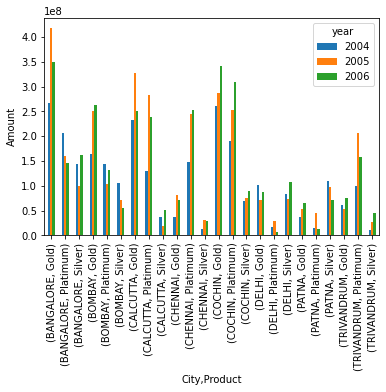

In [480]:
plt.figure(figsize=(15,10))
Final_join.pivot_table(index=['City','Product'],columns=['year'],values='Amount_x',aggfunc=sum).plot(kind='bar')
plt.ylabel('Amount')
plt.show()

# 4. Create graphs for
## a. Monthly comparison of total spends, city wise

<AxesSubplot:xlabel='City'>

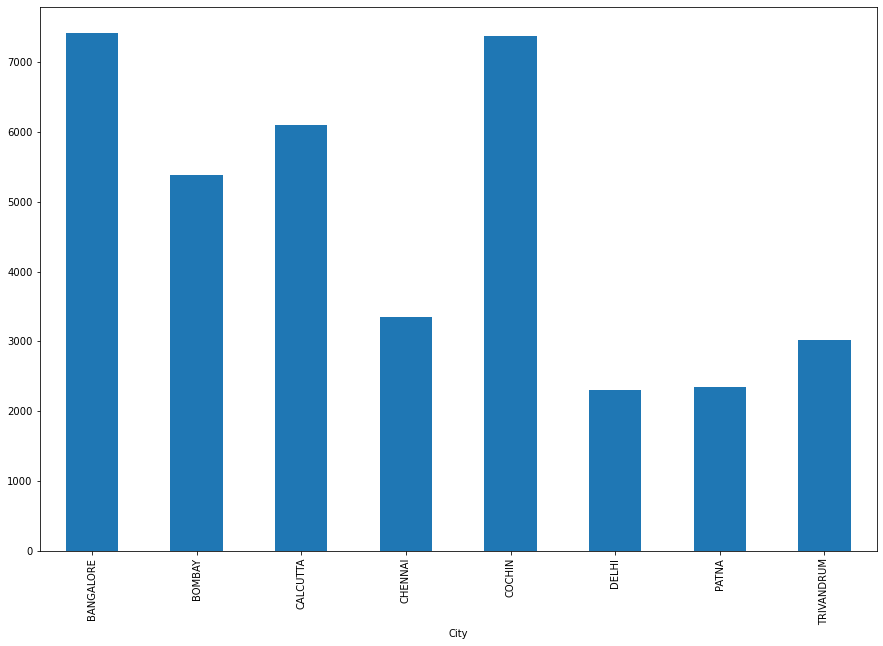

In [479]:
plt.figure(figsize=(15,10))

Final_join.groupby(['City'])['Amount_x'].count().plot(kind='bar')


# b. Comparison of yearly spend on air tickets

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

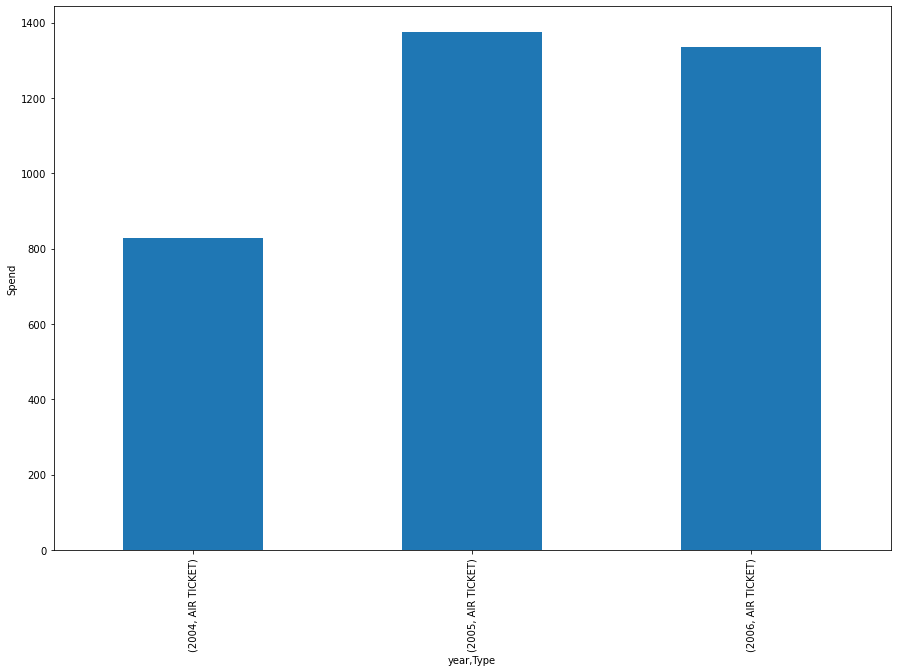

In [478]:
plt.figure(figsize=(15,10))
Final_join.loc[Final_join.Type=="AIR TICKET"].groupby(['year','Type'])['Amount_x'].count().plot(kind='bar')
plt.ylabel('Spend')
plt.plot

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [454]:
spendmonth=Final_join.Month_x.dt.month

In [455]:
Final_join.loc[:,'spendmonth']=spendmonth

<AxesSubplot:xlabel='spendmonth,Product'>

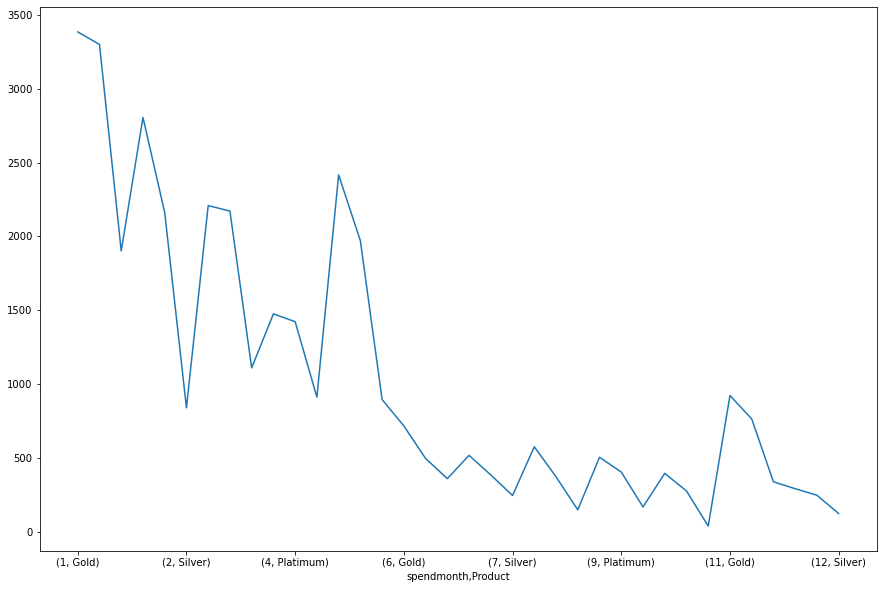

In [461]:
plt.figure(figsize=(15,10))
Final_join.groupby(['spendmonth','Product'])['Amount_x'].count().plot(kind='line')

# 5. Write user defined PYTHON function to perform the following analysis:
## You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [617]:
def top10(x,y):
    x=str(input('Enter the Product '))
    y=str(input('Enter the year '))
    return Final_join.loc[(Final_join.Product==x)&(Final_join.year==y),['Customer','Product','year','Amount_y']].groupby('Customer').max().sort_values(by='Amount_y',axis=0,ascending=False).head(10)

In [618]:
top10(x,y)

Enter the ProductGold
Enter the year2006


,Product,year,Amount_y
Customer,,,
A42,Gold,2006,498112.117066
A13,Gold,2006,496905.458212
A43,Gold,2006,495074.577306
A11,Gold,2006,493830.393161
A28,Gold,2006,492990.122214
A14,Gold,2006,492500.440567
A10,Gold,2006,491107.004440
A12,Gold,2006,491017.662854
A29,Gold,2006,489652.083342
